# url: https://note.com/kiyo_ai_note/n/n0df3f4d33139

Pythonライブラリ(決定木の可視化)：dtreeviz

## １．概要
機械学習で紹介した決定木モデルの可視化ライブラリとしてdtreevizを紹介します。Graphvizよりも直感的なグラフが作成可能であり、機械学習によるモデルのブラックボックス化を改善できます。

url: https://github.com/parrt/dtreeviz

【※APIの変更】
Version2.0以降でAPIが変更されたため最新Ver.をインストールした方は本記事ではエラーが出ます。

## ３－１．サンプルデータの取得
今回使用するサンプルデータを読み込みます。

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris() #Irisデータを読み込む
data, target = iris.data, iris.target #データとラベルを分ける
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=0) # 学習データとテストデータへ7:3で分割

display(x_train.dtype, x_test.dtype, y_train.dtype, y_test.dtype) #データ型の確認
display(x_train.shape, x_test.shape, y_train.shape, y_test.shape) #データ数の確認

dtype('float64')

dtype('float64')

dtype('int64')

dtype('int64')

(105, 4)

(45, 4)

(105,)

(45,)

## ３－２．決定木モデルの作成・学習・推論
決定木モデルを作成・学習・推論します。

In [2]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier() #分類問題のモデルを作成
tree.fit(x_train, y_train) # 学習
y_pred = tree.predict(x_test) # テストデータの予測値

display(tree.get_params())
display(y_pred)
display('学習時スコア：', tree.score(x_train, y_train), '検証スコア', tree.score(x_test, y_test))

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

'学習時スコア：'

1.0

'検証スコア'

0.9777777777777777

## ３－３．可視化(重要度分析およびGraphviz）

一般的な可視化方法として重要度分析およびGraphvizによる可視化を実施します。

array([0.        , 0.04300928, 0.40406279, 0.55292793])

<BarContainer object of 4 artists>

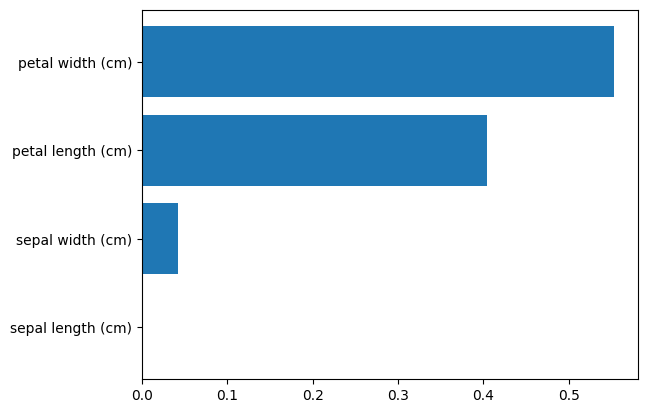

In [3]:
import matplotlib.pyplot as plt

x = iris.feature_names #特徴量名 ->['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
y = tree.feature_importances_ #特徴量の重要度

display(y)
plt.barh(x, y)

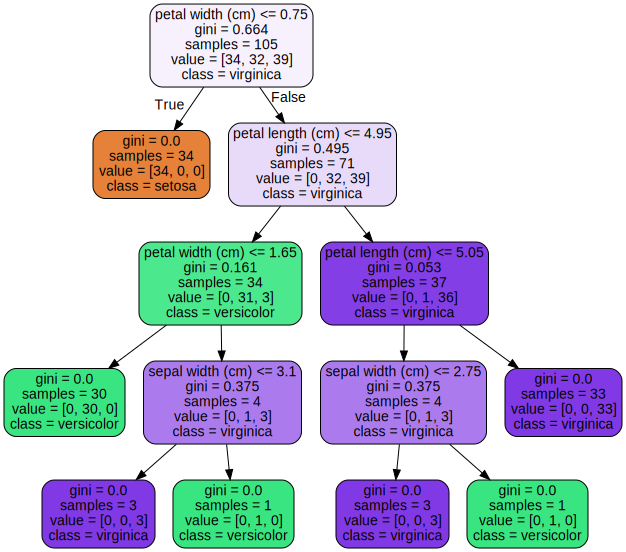

In [4]:
import graphviz
from sklearn.tree import export_graphviz

dot = export_graphviz(tree, filled=True, rounded=True,
                      class_names=['setosa', 'versicolor', 'virginica'],
                      feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
                      out_file=None)

graph = graphviz.Source(dot) #DOT記法をレンダリング
graph #グラフを出力

## ４．dtreeviz
### ４－１．設定パラメータ
dtreevizで設定するパラメータは下記の通りです。

【パラメータ一覧】

    ●target_name：目的のカラム名
    　->回帰分析： target_name=予想する値のカラム名
    　->分類問題： target_name='variety'とする
    ●feature_names ：特徴量のカラム名(List形式)
    ●class_names ：（正解）ラベルのカラム名(List形式)
    ●orientation：表示の向きを変更（'LR'で横向き）
    ●X：指定した１つのデータの分類プロセスを表示

## ４－２．シンプル図作成
パラメータを最小にしてシンプルな図を作成してみます。

In [5]:
# pip install dtreeviz

In [6]:
import dtreeviz

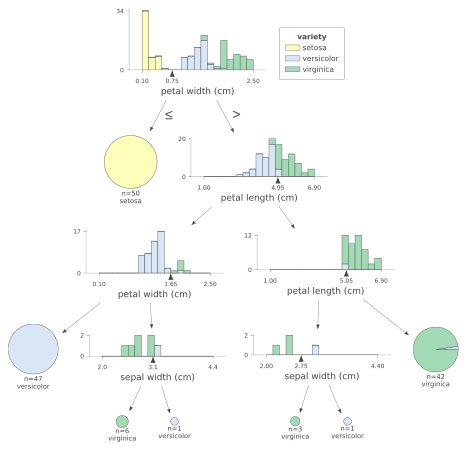

In [7]:
viz = dtreeviz.model(
    tree, # 決定木モデル
    iris.data, #データ
    iris.target, #データラベル
    target_name='variety', #正解値のラベル
    feature_names=iris.feature_names, #特徴量名
    class_names=[str(i) for i in iris.target_names], #クラス名：['setosa', 'versicolor', 'virginica'],
)

# viz.view() #ブラウザ上で表示
# viz #Jupyter Notebook上で表示
viz.view()

上記の通り直感的な図が作成できました。

【図から確認できること】

    ●重要度分析の通りpetal width/lengthが重要である
    　ー＞setosaはpetal width<0.75で100%分類されている
    　ー＞petal lengthの時点でversicolorとvirginicaの大部分は分類されている
    ●最後のpetal width(@1.65cm)で判定ミスがあるー＞木構造を深くすれば対応できるが過学習を考慮するとこのくらいで妥当かもしれない。

## ４－３．体裁調整：orientation、X
図の向きはorientationで変更できます。

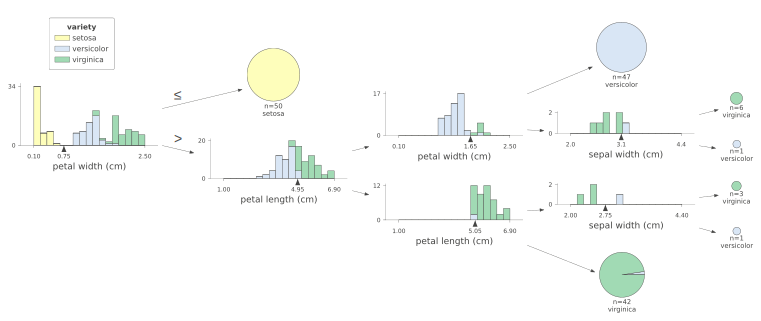

In [8]:
viz = dtreeviz.model(
    tree, # 決定木モデル
    iris.data, #データ
    iris.target, #データラベル
    target_name='variety', #正解値のラベル
    feature_names=iris.feature_names, #特徴量名
    class_names=[str(i) for i in iris.target_names] #クラス名：['setosa', 'versicolor', 'virginica'],
)

viz.view(orientation = 'LR') #ブラウザ上で表示
# viz

もし入力したデータがモデルによってどのように選択されるかを可視化したい場合は”X”引数にデータを渡すと可視化されます。あくまで学習モデルが計算した結果を出力するため未知のデータでも問題ありません。

## あとがき

決定木モデルはそこそこ精度がよいので使用しやすいため、綺麗に可視化できるのは非常によいですね。

視化ツールとしてLIME (local interpretable model-agnostic explanations)やSHAP（SHapley Additive exPlanations）といったものもあるため時間があれば別記事作成予定

url: https://horomary.hatenablog.com/entry/2019/09/16/000110

url: https://qiita.com/takotatsu5141/items/eab63331aec5aea2c3f8
